<a href="https://colab.research.google.com/github/desstaw/PrivacyPreservingTechniques/blob/main/Anonymizing_PKI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook preprocesses on the Personal Key Indicators Dataset

In [138]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns



url = "https://raw.githubusercontent.com/desstaw/PrivacyPreservingTechniques/main/datasets/personal_key_indicators_heart_disease.csv"
df = pd.read_csv(url)

import warnings
warnings.simplefilter('ignore')

In [139]:
df.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [141]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### Delete rows with missing values

In [142]:
df.dropna(inplace=True)

df = df.dropna()

In [143]:
# Reduce the number of rows to 300000
num_rows = len(df)

desired_num_rows = 300000

if num_rows > desired_num_rows:

    rows_to_delete = num_rows - desired_num_rows

    np.random.seed(42)

    indices_to_delete = np.random.choice(num_rows, size=rows_to_delete, replace=False)

    df = df.drop(df.index[indices_to_delete])

In [144]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,28.324933,3.362790,3.900267,7.096190
std,6.355410,7.941112,7.957975,1.436541
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.450000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Kidney_DS/original_PKI.csv', index=False)

In [147]:
df_diff = df.copy()

### Definig ranges based on statistical distribution on numerical values

BMI ranges
under 18.5 – This is described as underweight. between 18.5 and 24.9 – This is described as the 'healthy range'. between 25 and 29.9 – This is described as overweight. between 30 and 39.9 – This is described as obesity.

(array([1.61910e+04, 1.61524e+05, 9.45600e+04, 2.18840e+04, 4.60100e+03,
        8.82000e+02, 2.39000e+02, 8.20000e+01, 2.40000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <BarContainer object of 10 artists>)

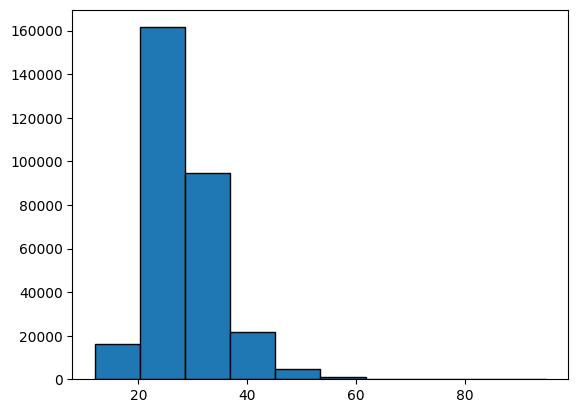

In [148]:
plt.hist(df['BMI'], bins=10, edgecolor='black')
#plt.hist(df['PhysicalHealth'], bins=10, edgecolor='black')
#plt.hist(df['MentalHealth'], bins=10, edgecolor='black')
#plt.hist(df['SleepTime'], bins=10, edgecolor='black')

In [149]:
print(df["Race"].value_counts().sort_index())
print(df["Diabetic"].value_counts().sort_index())
print(df["GenHealth"].value_counts().sort_index())

American Indian/Alaskan Native      4891
Asian                               7587
Black                              21496
Hispanic                           25692
Other                              10250
White                             230084
Name: Race, dtype: int64
No                         253007
No, borderline diabetes      6388
Yes                         38204
Yes (during pregnancy)       2401
Name: Diabetic, dtype: int64
Excellent     62791
Fair          32470
Good          87438
Poor          10603
Very good    106698
Name: GenHealth, dtype: int64


In [150]:
abstraction_mapping = {
    'No': 'No',
    'No, borderline diabetes': 'Other',
    'Yes': 'Yes',
    'Yes (during pregnancy)': 'Other'
}

# Apply the abstraction to the 'Diabetic' column
df['Diabetic'] = df['Diabetic'].map(abstraction_mapping)

In [151]:
abstraction_mapping = {
    'Poor': 'Fair/Poor',
    'Fair': 'Fair/Poor',
    'Good': 'Good',
    'Very good': 'Good',
    'Excellent': 'Good'
}

# Apply the abstraction to the 'Diabetic' column
df['GenHealth'] = df['GenHealth'].map(abstraction_mapping)

### Basic pre-processing

In [152]:
# Define the generalization hierarchy for each BMI and SleepTime
generalization_hierarchy = {
    'BMI': pd.cut(df['BMI'], bins=[0, 18.6, 25.0, 30.0, 95.0]),
    'SleepTime': pd.cut(df['SleepTime'], bins=[0, 3, 5, 7, 9, 20])
}

for col, hierarchy in generalization_hierarchy.items():
    df[col] = pd.cut(df[col], bins=hierarchy.cat.categories, labels=hierarchy.cat.categories[:-1])

###Test for K-anonymity with different k values and different QIs

In [153]:
from collections import Counter

from collections import Counter
# Convert interval column to string type
df['AgeCategory'] = df['AgeCategory'].astype(str)
df['Diabetic'] = df['Diabetic'].astype(str)
df['Race'] = df['Race'].astype(str)




# Define the quasi-identifiers
qi_cols = ['AgeCategory', 'Diabetic','Race' ]

k_anonymity = 10

# Calculate the frequency count of unique combinations of quasi-identifiers
qi_counts = df[qi_cols].apply(tuple, axis=1).value_counts()

# Find the number of records that do not satisfy k-anonymity
num_violations = (qi_counts < k_anonymity).sum()

print("Number of records that do not satisfy k-anonymity:", num_violations)

Number of records that do not satisfy k-anonymity: 7


### Test for l-diversity with l=2 for the sensitive attribute "HeartDisease"

In [154]:
sensitive_attribute = 'HeartDisease'

l_diversity = 2

# Initialize counter
count = 0

# Define the quasi-identifiers
qi_cols = ['AgeCategory', 'Diabetic', 'Race']

# Check l-diversity for each group of records
for qi_vals, group in df.groupby(qi_cols):
    if len(group[sensitive_attribute].unique()) < l_diversity:
        count += len(group)

# Print the total number of records that do not satisfy l-diversity
print(f"Total number of records that do not satisfy l-diversity: {count}")

Total number of records that do not satisfy l-diversity: 752


### Save the dataset

In [155]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Kidney_DS/anonymized_PKI.csv', index=False)

### Differential Privacy

In [156]:
epsilon = 1.0
sensitivity = 3.0

# Apply differential privacy to the 'age', 'trestbps', 'chol', 'thalach', and 'oldpeak' columns using Laplace noise
for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    df_diff[col] += np.random.laplace(loc=0, scale=sensitivity/epsilon, size=len(df))

# Print the first five rows of the dataset after applying differential privacy
df_diff.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,18.981669,Yes,No,No,9.016151,30.082689,No,Female,55-59,White,Yes,Yes,Very good,5.739317,Yes,No,Yes
1,No,17.308494,No,No,Yes,-2.934318,1.048345,No,Female,80 or older,White,No,Yes,Very good,7.888007,No,No,No
2,No,27.852812,Yes,No,No,16.225763,30.863224,No,Male,65-69,White,Yes,Yes,Fair,7.463478,Yes,No,No
3,No,24.694819,No,No,No,1.846377,0.310056,No,Female,75-79,White,No,No,Good,7.265513,No,No,Yes
4,No,27.124812,No,No,No,39.398263,8.189176,Yes,Female,40-44,White,No,Yes,Very good,15.651812,No,No,No
5,Yes,27.976562,Yes,No,No,4.735029,2.476451,Yes,Female,75-79,Black,No,No,Fair,11.403722,No,No,No
6,No,23.471482,No,No,No,12.434820,9.979619,No,Female,70-74,White,No,Yes,Fair,3.649298,Yes,No,Yes
8,No,30.784581,No,No,No,9.344927,1.561833,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,3.384151,No,Yes,No
9,No,39.809316,No,No,No,-0.844998,0.778312,Yes,Male,65-69,White,No,Yes,Good,10.111768,No,No,No
10,Yes,31.497183,Yes,No,No,23.377006,-2.406983,Yes,Male,60-64,White,Yes,No,Poor,15.117675,Yes,No,No


In [157]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Kidney_DS/diff_privacy_PKI.csv', index=False)